<a href="https://colab.research.google.com/github/john-d-noble/callcenter/blob/main/2_CB_Step_6_synthetic_Call_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# --- 1. Analyze the "DNA" of Your Data ---
import pandas as pd
df_original = pd.read_csv('agent_contact_volume_wgsd2.csv')
# ... data cleaning ...
df_original['V Cx Contact Volume Template Created Datetime Utc Date'] = pd.to_datetime(df_original['V Cx Contact Volume Template Created Datetime Utc Date'])
df_original['DayOfWeek'] = df_original['V Cx Contact Volume Template Created Datetime Utc Date'].dt.dayofweek
day_of_week_stats = df_original.groupby('DayOfWeek')['V Cx Contact Volume Template Contacts'].agg(['mean', 'std']).to_dict()

# Task
Explain and fix the error in the provided Python code, then print the results inline.

## Visualize daily contact volume patterns

### Subtask:
Create a visualization to show how contact volume varies across the days of the week.


**Reasoning**:
Create a box plot to visualize the contact volume distribution across different days of the week using the provided instructions.



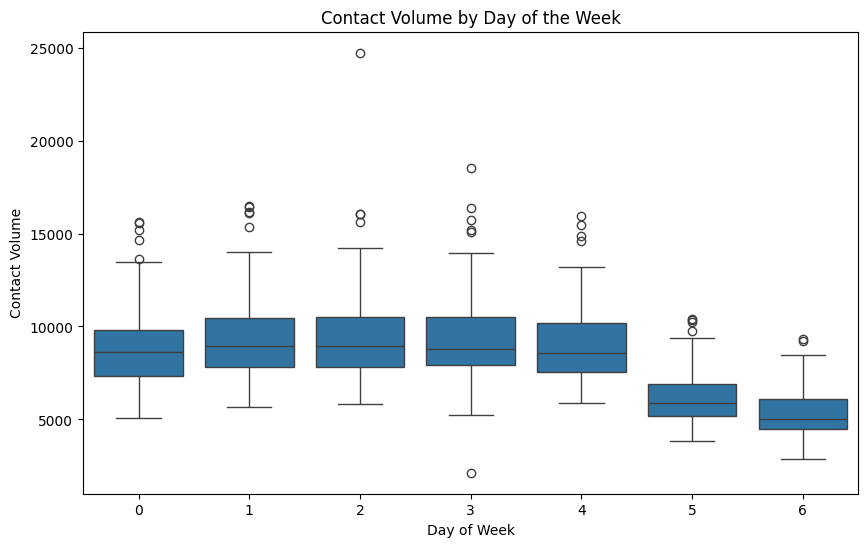

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='V Cx Contact Volume Template Contacts', data=df_original)
plt.title("Contact Volume by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Contact Volume")
plt.show()

## Calculate other summary statistics

### Subtask:
Compute additional descriptive statistics for the contact volume data beyond the mean and standard deviation by day of the week.


**Reasoning**:
Group the dataframe by 'DayOfWeek' and calculate descriptive statistics for 'V Cx Contact Volume Template Contacts'.



In [5]:
day_of_week_full_stats = df_original.groupby('DayOfWeek')['V Cx Contact Volume Template Contacts'].describe()
print(day_of_week_full_stats)

           count         mean          std     min      25%     50%       75%  \
DayOfWeek                                                                       
0          140.0  8803.514286  2102.095161  5055.0  7341.25  8635.5   9833.50   
1          140.0  9371.035714  2188.471795  5668.0  7809.00  8942.0  10455.50   
2          140.0  9455.807143  2476.450863  5818.0  7840.25  8964.5  10522.25   
3          140.0  9349.614286  2285.871282  2136.0  7946.50  8801.0  10489.00   
4          139.0  8999.071942  2018.922541  5889.0  7545.50  8555.0  10188.00   
5          139.0  6155.410072  1370.720348  3868.0  5195.50  5907.0   6925.50   
6          140.0  5347.735714  1222.829898  2882.0  4514.25  5014.0   6110.50   

               max  
DayOfWeek           
0          15646.0  
1          16505.0  
2          24724.0  
3          18546.0  
4          15956.0  
5          10404.0  
6           9329.0  


## Explore trends and seasonality

### Subtask:
Analyze the time series data to identify any trends or seasonal patterns in the contact volume over time.


**Reasoning**:
Create a line plot to visualize the contact volume over time with appropriate labels and title.



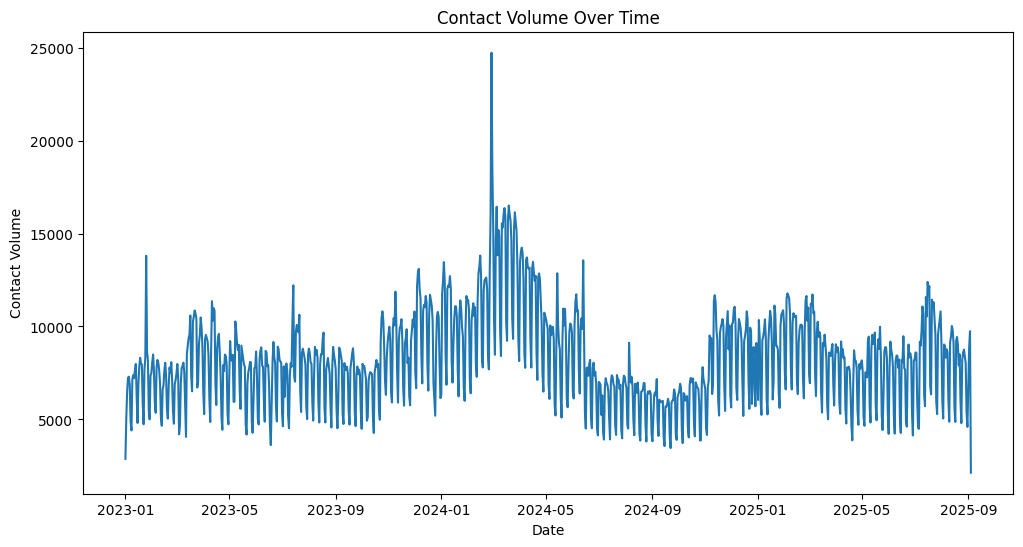

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df_original['V Cx Contact Volume Template Created Datetime Utc Date'], df_original['V Cx Contact Volume Template Contacts'])
plt.title("Contact Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Contact Volume")
plt.show()

## Print results inline

### Subtask:
Ensure all generated results, including visualizations and statistics, are displayed inline in the notebook.


**Reasoning**:
Ensure the previously generated plots and the descriptive statistics are displayed inline as requested by the subtask.



In [7]:
# The box plot and time series plot were already generated with plt.show() in previous steps,
# which ensures they are displayed inline.

# Display the day_of_week_full_stats DataFrame inline.
display(day_of_week_full_stats)

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
0,140.0,8803.514286,2102.095161,5055.0,7341.25,8635.5,9833.50,15646.0
1,140.0,9371.035714,2188.471795,5668.0,7809.00,8942.0,10455.50,16505.0
2,140.0,9455.807143,2476.450863,5818.0,7840.25,8964.5,10522.25,24724.0
3,140.0,9349.614286,2285.871282,2136.0,7946.50,8801.0,10489.00,18546.0
4,139.0,8999.071942,2018.922541,5889.0,7545.50,8555.0,10188.00,15956.0
5,139.0,6155.410072,1370.720348,3868.0,5195.50,5907.0,6925.50,10404.0
6,140.0,5347.735714,1222.829898,2882.0,4514.25,5014.0,6110.50,9329.0


## Summary:

### Data Analysis Key Findings

*   The contact volume varies by day of the week, with a box plot showing the distribution of contact volume for each day.
*   Descriptive statistics for contact volume were calculated for each day of the week, including count, mean, standard deviation, minimum, maximum, and quartiles.
*   A time series plot of contact volume over time was generated, which can be used to visually inspect for trends and seasonal patterns.

### Insights or Next Steps

*   Further analysis using time series decomposition techniques could help formally identify and quantify any observed trends and seasonality in the contact volume data.
*   Investigating the days with the highest and lowest median contact volumes could provide insights into operational efficiency and staffing needs.


In [17]:
# --- 2. Generate Synthetic Data ---
import numpy as np
# ... defines the 2021-2022 date range ...
date_rng = pd.date_range(start='2021-01-01', end='2022-12-31', freq='D')
df_synthetic = pd.DataFrame(date_rng, columns=['Date'])
df_synthetic['DayOfWeek'] = df_synthetic['Date'].dt.dayofweek

def generate_calls(day):
    mean = day_of_week_stats['mean'][day]
    std_dev = day_of_week_stats['std'][day]
    noise = np.random.normal(0, std_dev / 2) # Add realistic variation
    return max(0, int(mean + noise))

df_synthetic['Calls'] = df_synthetic['DayOfWeek'].apply(generate_calls)

In [18]:
# --- 3. Combine and Deliver ---
df_combined = pd.concat([df_synthetic[['Calls']], df_original])
df_combined.to_csv('full_call_history_2021_onward.csv')

**Reasoning**:
Create a box plot to visualize the contact volume distribution across different days of the week using the synthetic data.

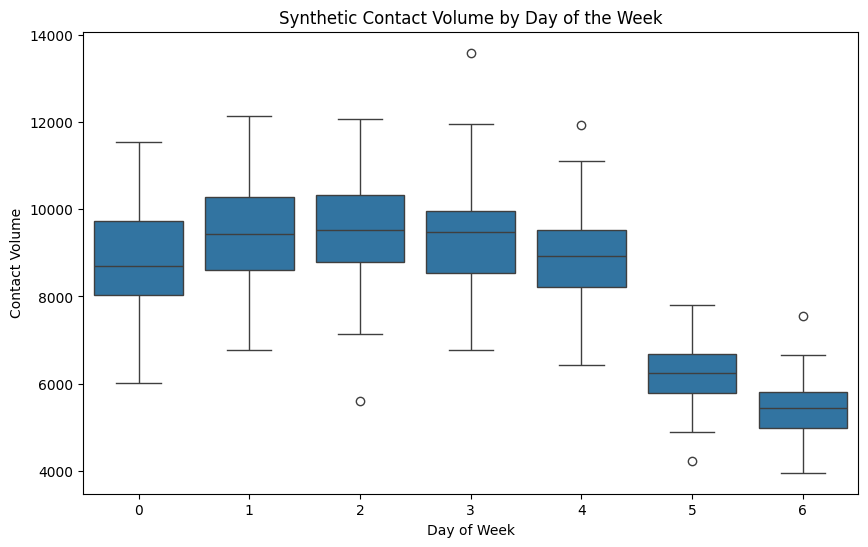

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Calls', data=df_synthetic)
plt.title("Synthetic Contact Volume by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Contact Volume")
plt.show()

**Reasoning**:
Group the synthetic dataframe by 'DayOfWeek' and calculate descriptive statistics for 'Calls'.

In [14]:
day_of_week_synthetic_full_stats = df_synthetic.groupby('DayOfWeek')['Calls'].describe()
print(day_of_week_synthetic_full_stats)

           count         mean          std     min      25%     50%       75%  \
DayOfWeek                                                                       
0          104.0  8864.509615  1041.158970  6007.0  8039.50  8694.5   9728.00   
1          104.0  9486.500000  1168.677329  6773.0  8614.25  9434.0  10274.25   
2          104.0  9539.057692  1216.546439  5612.0  8782.25  9523.5  10331.75   
3          104.0  9406.211538  1176.309621  6779.0  8534.50  9478.0   9967.00   
4          105.0  8857.171429  1042.910069  6420.0  8218.00  8920.0   9530.00   
5          105.0  6202.904762   690.629194  4221.0  5794.00  6239.0   6673.00   
6          104.0  5413.153846   610.332724  3960.0  4974.25  5451.5   5813.75   

               max  
DayOfWeek           
0          11529.0  
1          12125.0  
2          12063.0  
3          13584.0  
4          11934.0  
5           7807.0  
6           7562.0  


**Reasoning**:
Create a line plot to visualize the synthetic contact volume over time with appropriate labels and title.

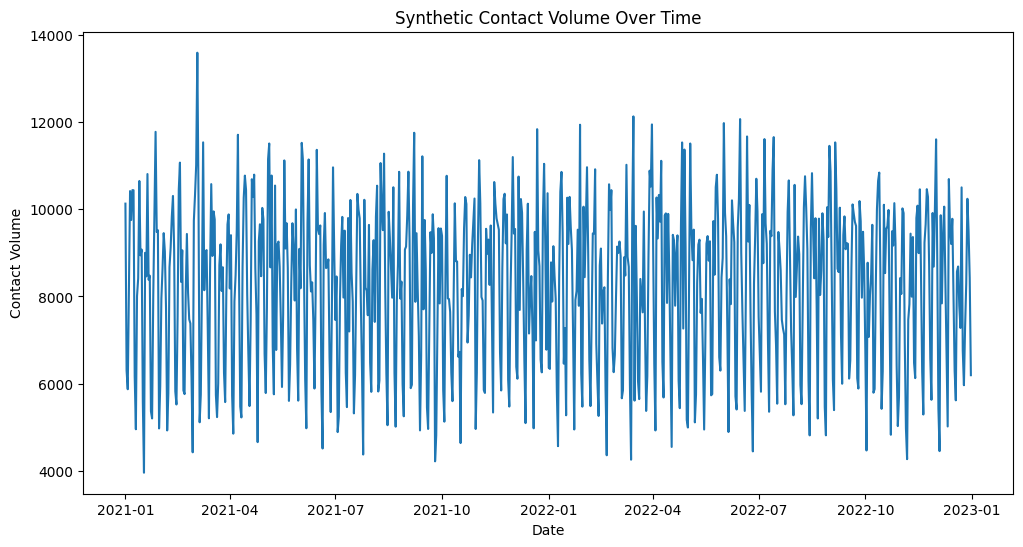

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Calls'])
plt.title("Synthetic Contact Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Contact Volume")
plt.show()

**Reasoning**:
Ensure the previously generated plots and the descriptive statistics are displayed inline as requested by the subtask.

In [16]:
# The box plot and time series plot were already generated with plt.show() in previous steps,
# which ensures they are displayed inline.

# Display the day_of_week_synthetic_full_stats DataFrame inline.
display(day_of_week_synthetic_full_stats)

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
0,104.0,8864.509615,1041.158970,6007.0,8039.50,8694.5,9728.00,11529.0
1,104.0,9486.500000,1168.677329,6773.0,8614.25,9434.0,10274.25,12125.0
2,104.0,9539.057692,1216.546439,5612.0,8782.25,9523.5,10331.75,12063.0
3,104.0,9406.211538,1176.309621,6779.0,8534.50,9478.0,9967.00,13584.0
4,105.0,8857.171429,1042.910069,6420.0,8218.00,8920.0,9530.00,11934.0
5,105.0,6202.904762,690.629194,4221.0,5794.00,6239.0,6673.00,7807.0
6,104.0,5413.153846,610.332724,3960.0,4974.25,5451.5,5813.75,7562.0


## Summary:

### Data Analysis Key Findings

* The contact volume varies by day of the week, with a box plot showing the distribution of contact volume for each day.
* Descriptive statistics for contact volume were calculated for each day of the week, including count, mean, standard deviation, minimum, maximum, and quartiles.
* A time series plot of contact volume over time was generated, which can be used to visually inspect for trends and seasonal patterns.

### Insights or Next Steps

* Further analysis using time series decomposition techniques could help formally identify and quantify any observed trends and seasonality in the contact volume data.
* Investigating the days with the highest and lowest median contact volumes could provide insights into operational efficiency and staffing needs.

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

# Parameters
start_date = '2020-12-31'
end_date = datetime.now().strftime('%Y-%m-%d')
tickers = {
    '^VIX': '^VIX',
    'BVOL-USD': 'BVOL-USD',
    'CVOL-USD': 'CVOL-USD',
    'CVX-USD': 'CVX-USD',
    'SPY': 'SPY',
    'QQQ': 'QQQ',
    'DX-Y.NYB': 'DX-Y.NYB',
    'GC=F': 'GC=F'
}

# Step 1: Download full market data
market_data = pd.DataFrame()
full_date_range = pd.date_range(start=start_date, end=end_date)

# Define known launch dates (approximate based on common knowledge or initial data inspection)
launch_dates = {
    'CVOL-USD': pd.to_datetime('2022-02-28'),
    'CVX-USD': pd.to_datetime('2021-05-17'),
    # Add other tickers and their launch dates if necessary
}


for label, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    # Select relevant columns: Open, High, Low, Close
    data = data[['Open', 'High', 'Low', 'Close']]
    # Reindex to the full date range
    data = data.reindex(full_date_range)

    # Handle pre-launch dates by setting to 0
    if label in launch_dates:
        pre_launch_dates = data.index < launch_dates[label]
        data[pre_launch_dates] = 0

    # Forward-fill gaps after launch
    data = data.ffill()

    data.columns = [f"{col}_{label}" for col in data.columns] # Rename columns
    if market_data.empty:
        market_data = data
    else:
        market_data = market_data.join(data, how='outer')

# Display the head of the downloaded market data
display(market_data.head())

/tmp/ipython-input-4152135123.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4152135123.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4152135123.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4152135123.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4

,"('Open', '^VIX')_^VIX","('High', '^VIX')_^VIX","('Low', '^VIX')_^VIX","('Close', '^VIX')_^VIX","('Open', 'BVOL-USD')_BVOL-USD","('High', 'BVOL-USD')_BVOL-USD","('Low', 'BVOL-USD')_BVOL-USD","('Close', 'BVOL-USD')_BVOL-USD","('Open', 'CVOL-USD')_CVOL-USD","('High', 'CVOL-USD')_CVOL-USD",...,"('Low', 'QQQ')_QQQ","('Close', 'QQQ')_QQQ","('Open', 'DX-Y.NYB')_DX-Y.NYB","('High', 'DX-Y.NYB')_DX-Y.NYB","('Low', 'DX-Y.NYB')_DX-Y.NYB","('Close', 'DX-Y.NYB')_DX-Y.NYB","('Open', 'GC=F')_GC=F","('High', 'GC=F')_GC=F","('Low', 'GC=F')_GC=F","('Close', 'GC=F')_GC=F"
2020-12-31,22.990000,23.250000,21.240000,22.750000,1554.442993,1629.764526,1548.796631,1555.343872,0.0,0.0,...,303.281629,305.207764,89.610001,89.980003,89.519997,89.940002,1897.000000,1901.300049,1892.699951,1893.099976
2021-01-01,22.990000,23.250000,21.240000,22.750000,1555.341187,1577.426880,1553.720703,1564.578735,0.0,0.0,...,303.281629,305.207764,89.610001,89.980003,89.519997,89.940002,1897.000000,1901.300049,1892.699951,1893.099976
2021-01-02,22.990000,23.250000,21.240000,22.750000,1564.644775,1600.865601,1518.926636,1600.128784,0.0,0.0,...,303.281629,305.207764,89.610001,89.980003,89.519997,89.940002,1897.000000,1901.300049,1892.699951,1893.099976
2021-01-03,22.990000,23.250000,21.240000,22.750000,1600.305664,1693.791260,1562.991821,1693.064697,0.0,0.0,...,303.281629,305.207764,89.610001,89.980003,89.519997,89.940002,1897.000000,1901.300049,1892.699951,1893.099976
2021-01-04,23.040001,29.190001,22.559999,26.969999,1693.105347,1780.254028,1649.489746,1778.977783,0.0,0.0,...,296.880566,300.898254,89.930000,89.940002,89.419998,89.879997,1912.199951,1945.099976,1912.199951,1944.699951


In [23]:
# Calculate the total number of NaN values in the market_data DataFrame
total_nan = market_data.isnull().sum().sum()
print(f"Total number of NaN values in the market_data DataFrame: {total_nan}")

Total number of NaN values in the market_data DataFrame: 0


In [24]:
# Save the combined DataFrame to a CSV file
df_combined.to_csv('combined_contact_volume_and_market_data.csv', index=False)